# Análise de Hosts Profissionais no Airbnb - Rio de Janeiro  

Este projeto tem como objetivo identificar anfitriões profissionais e comuns no Airbnb da cidade do Rio de Janeiro, suas tendências e diferenças.  

- **Fonte:** [Inside Airbnb](https://insideairbnb.com/get-the-data/)  
- **Período:** Até um ano anterior ao dia 27 de junho de 2024.  
- **Licença:** [Creative Commons BY 4.0](https://creativecommons.org/licenses/by/4.0/).  

## Importando as bibliotecas utilizadas

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações iniciais
sns.set_theme(style="darkgrid")


## Carregar os dados

In [29]:
# Carregar os dados
rio_listing = pd.read_csv('listings.csv', index_col=0)


## Verificação do tamanho dos dados e colunas vazias

In [30]:
# Verificação do tamanho dos dados
print(f"O dataset possui {rio_listing.shape[0]} linhas e {rio_listing.shape[1]} colunas.")

# Identificar e remover colunas completamente vazias
empty_columns = rio_listing.columns[rio_listing.isnull().all()].tolist()
print(f"Colunas vazias: {empty_columns}")

rio_listing = rio_listing.dropna(axis=1, how='all')


O dataset possui 34664 linhas e 17 colunas.
Colunas vazias: ['neighbourhood_group', 'license']


## Visualização inicial dos dados

In [31]:
# Visualização inicial dos dados
print("Visualização inicial dos dados:")
rio_listing.head(5)


Visualização inicial dos dados:


,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,,,,,,,,,,,,,,,
17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,Copacabana,-22.96599,-43.17940,Entire home/apt,310.0,5,319,2024-06-08,1.88,1,274,23
220377,Suíte Casal (banheiro privativo),1142424,Taciana,Tijuca,-22.92880,-43.24046,Private room,220.0,1,5,2024-03-28,0.03,3,283,1
25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,Copacabana,-22.97735,-43.19105,Entire home/apt,203.0,2,291,2024-06-02,1.70,1,241,23
35764,COPACABANA SEA BREEZE - RIO - 25 X Superhost,153691,Patricia Miranda & Paulo,Copacabana,-22.98107,-43.19136,Entire home/apt,201.0,3,476,2024-06-25,2.85,1,93,36
223073,Modern Loft 1 • Ipanema Posto 9 • 500 mb,503995,❤️ BrUx ❤️,Ipanema,-22.98280,-43.20467,Entire home/apt,321.0,1,471,2024-06-02,3.04,7,348,17


## Distribuição de listagens por anfitrião

Como os anfitriões estão distribuídos com base no número de listagens?  

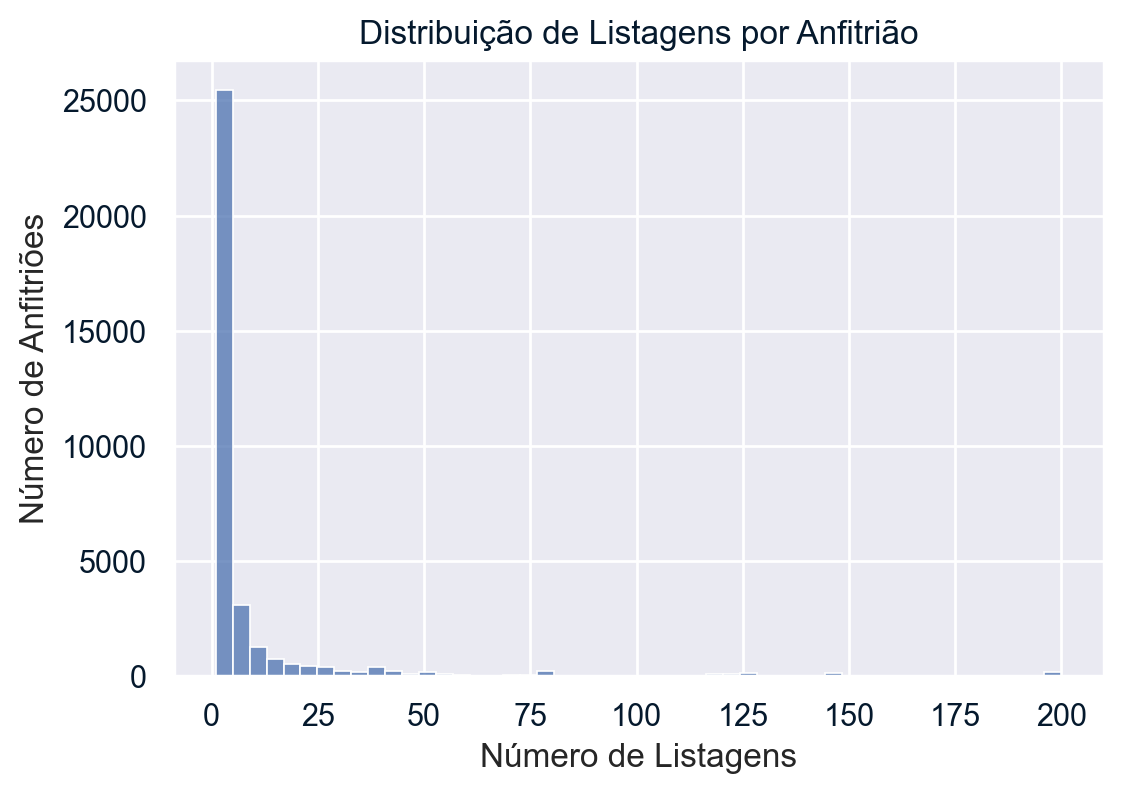

In [32]:
plt.figure(figsize=(6, 4))
sns.histplot(rio_listing['calculated_host_listings_count'], bins=50, kde=False, color='#4c72b0')
plt.title('Distribuição de Listagens por Anfitrião')
plt.xlabel('Número de Listagens')
plt.ylabel('Número de Anfitriões')
plt.show()


## Identificação de anfitriões profissionais

In [33]:
# Determinar o número de listagens únicas por anfitrião
host_listings_count = rio_listing.groupby('host_id')['calculated_host_listings_count'].max()

# Definir o limiar de anfitriões profissionais (Acima da média)
threshold = host_listings_count.mean()

# Criar uma coluna indicando se um anfitrião é profissional
rio_listing['is_professional'] = rio_listing['host_id'].map(lambda x: host_listings_count[x] > threshold)

# Total de cada tipo de anfitrião (contagem de únicos)
host_counts = rio_listing[['host_id', 'is_professional']].drop_duplicates().groupby('is_professional')['host_id'].count().reset_index(name='count')
print("Contagem de anfitriões por tipo:")
print(host_counts)


Contagem de anfitriões por tipo:
   is_professional  count
0            False  16091
1             True   4681


## Diferença de preço entre anfitriões comuns e profissionais

Qual a diferença de preço entre anfitriões profissionais e comuns? 

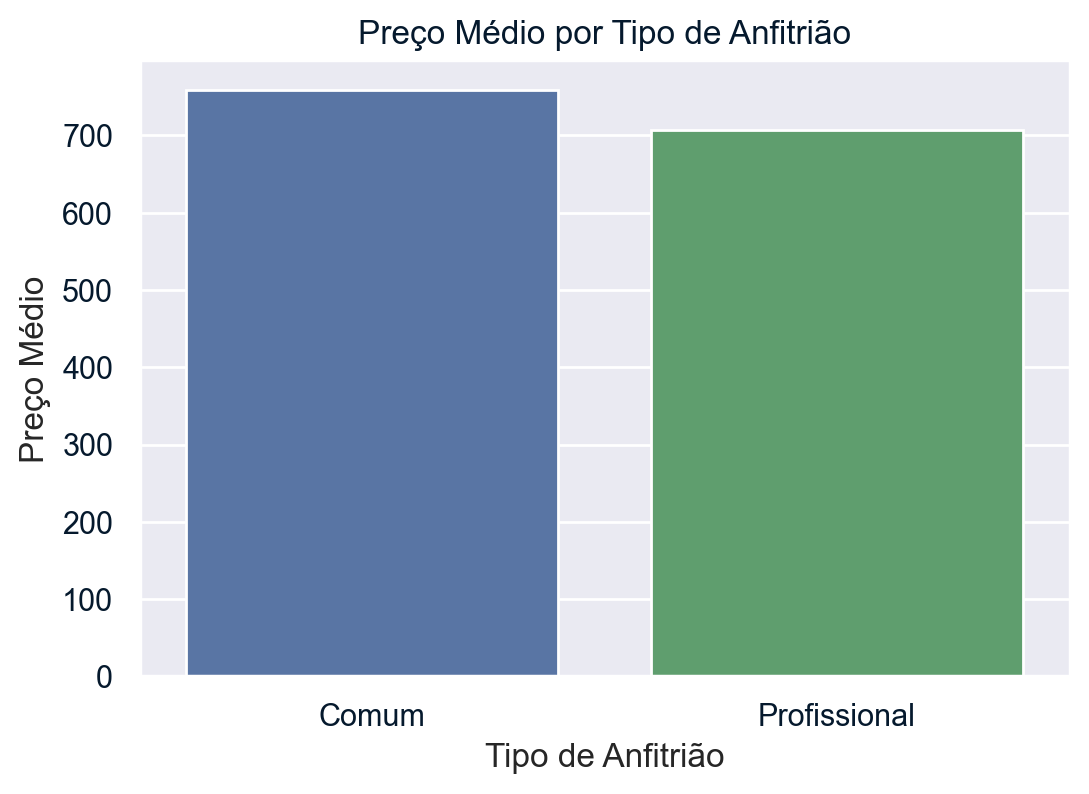

In [34]:
price_difference = rio_listing.groupby('is_professional')['price'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=price_difference, x='is_professional', y='price', palette=['#4c72b0', '#55a868'])
plt.xticks([0, 1], ['Comum', 'Profissional'])
plt.xlabel('Tipo de Anfitrião')
plt.ylabel('Preço Médio')
plt.title('Preço Médio por Tipo de Anfitrião')
plt.show()


## Distribuição de anfitriões pelos bairros mais populares

Como os anfitriões estão distribuídos pelos bairros mais populares? 

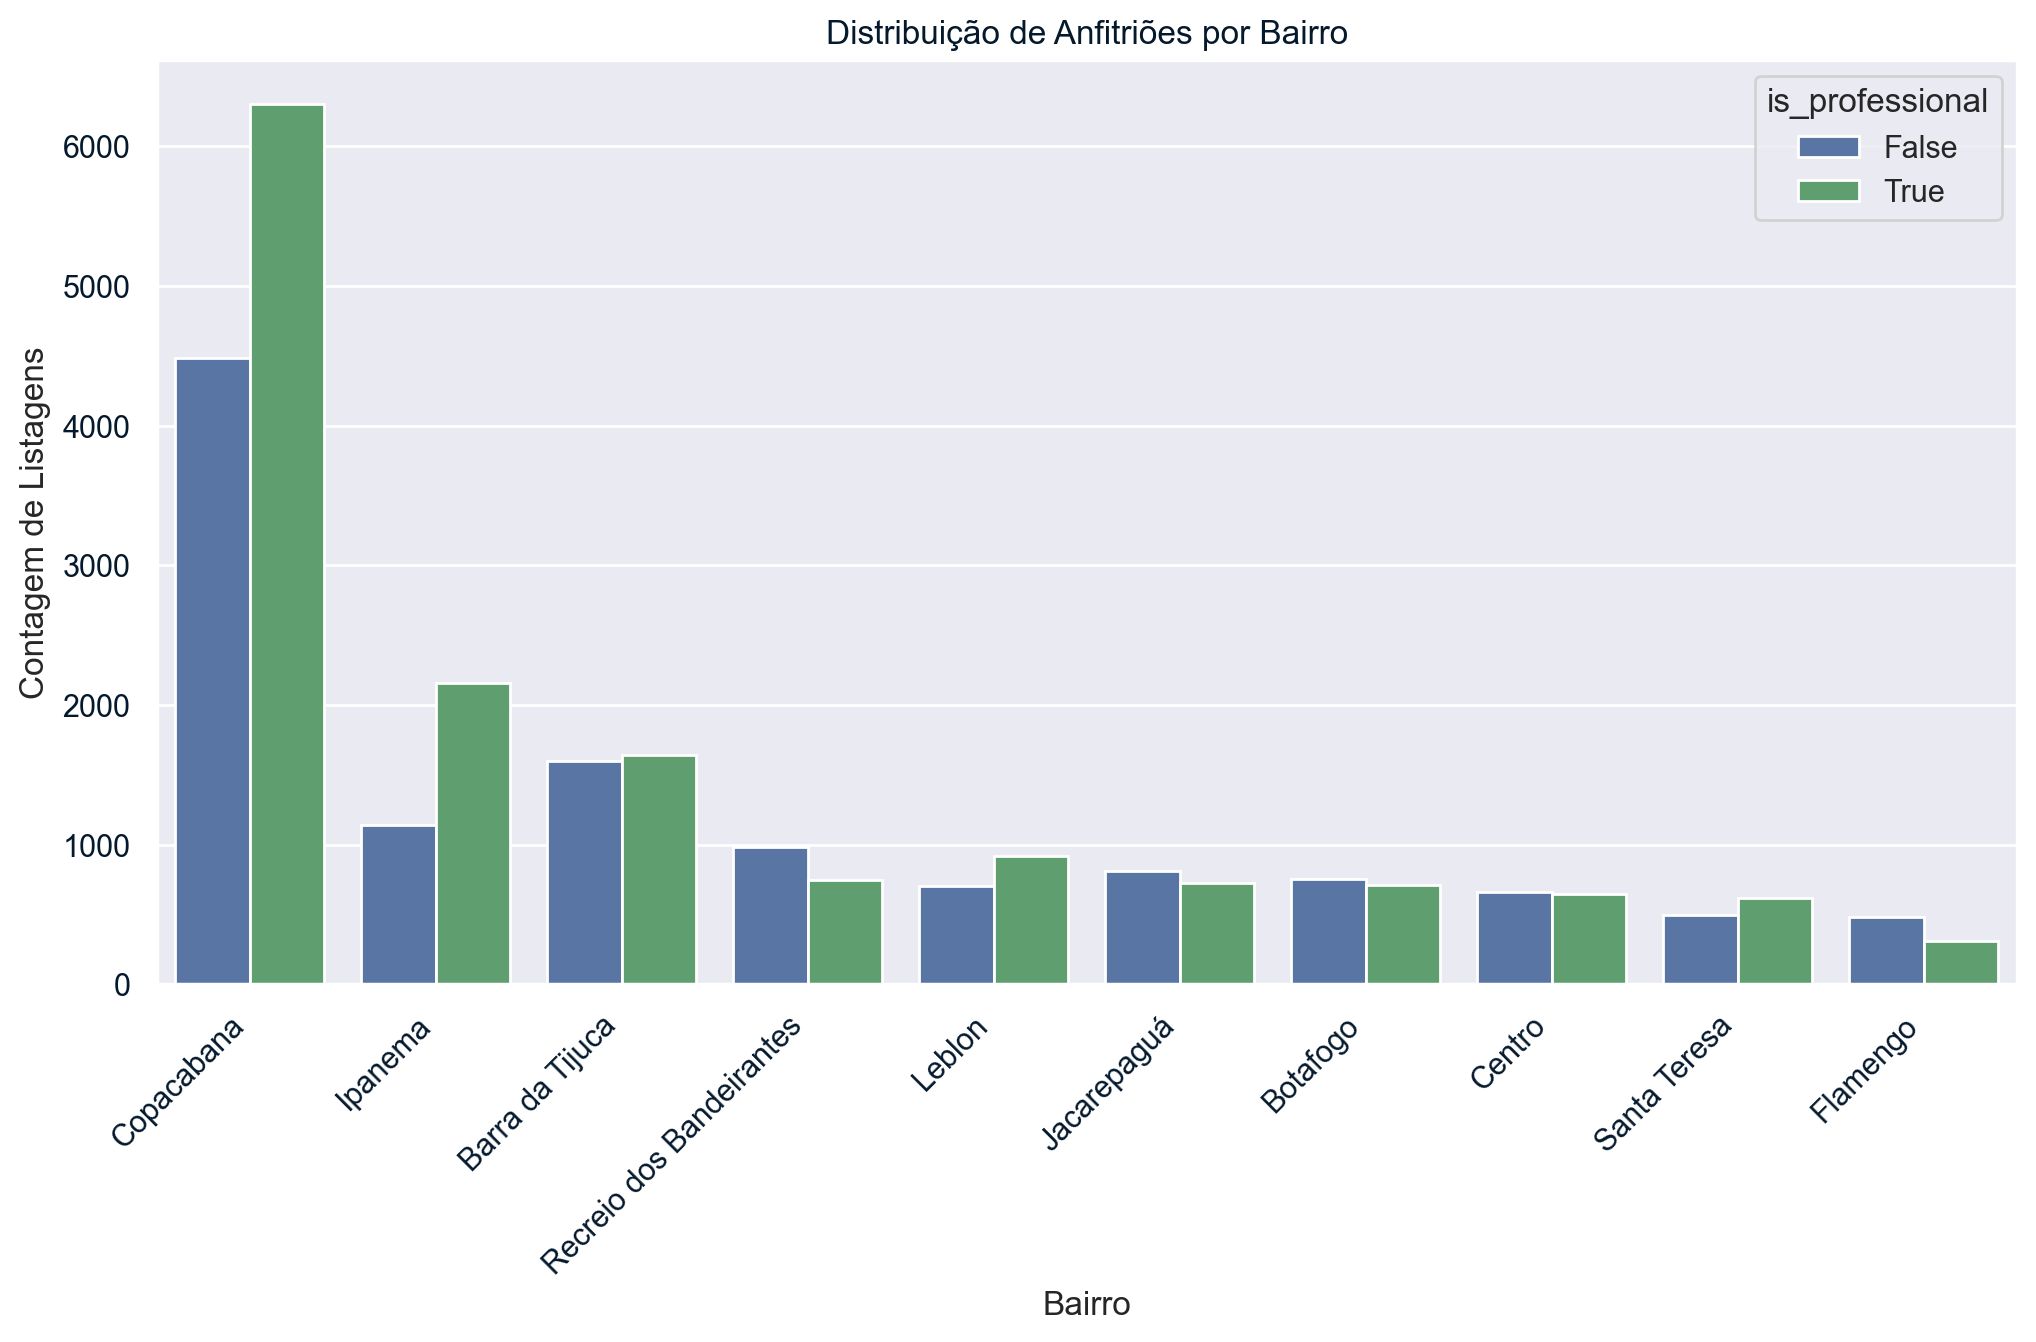

In [35]:
top_neighbourhoods = rio_listing['neighbourhood'].value_counts().head(10).index.tolist()
top_neighbourhoods_by_host = rio_listing[rio_listing['neighbourhood'].isin(top_neighbourhoods)]

counts_by_neighbourhood = top_neighbourhoods_by_host.groupby(['neighbourhood', 'is_professional']).size().sort_values(ascending=False).reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=counts_by_neighbourhood, x='neighbourhood', y='count', hue='is_professional', palette=['#4c72b0', '#55a868'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bairro')
plt.ylabel('Contagem de Listagens')
plt.title('Distribuição de Anfitriões por Bairro')
plt.show()


## Análise de preços sem outliers nos bairros mais populares

Quais são os preços típicos (sem outliers) nos bairros mais populares?

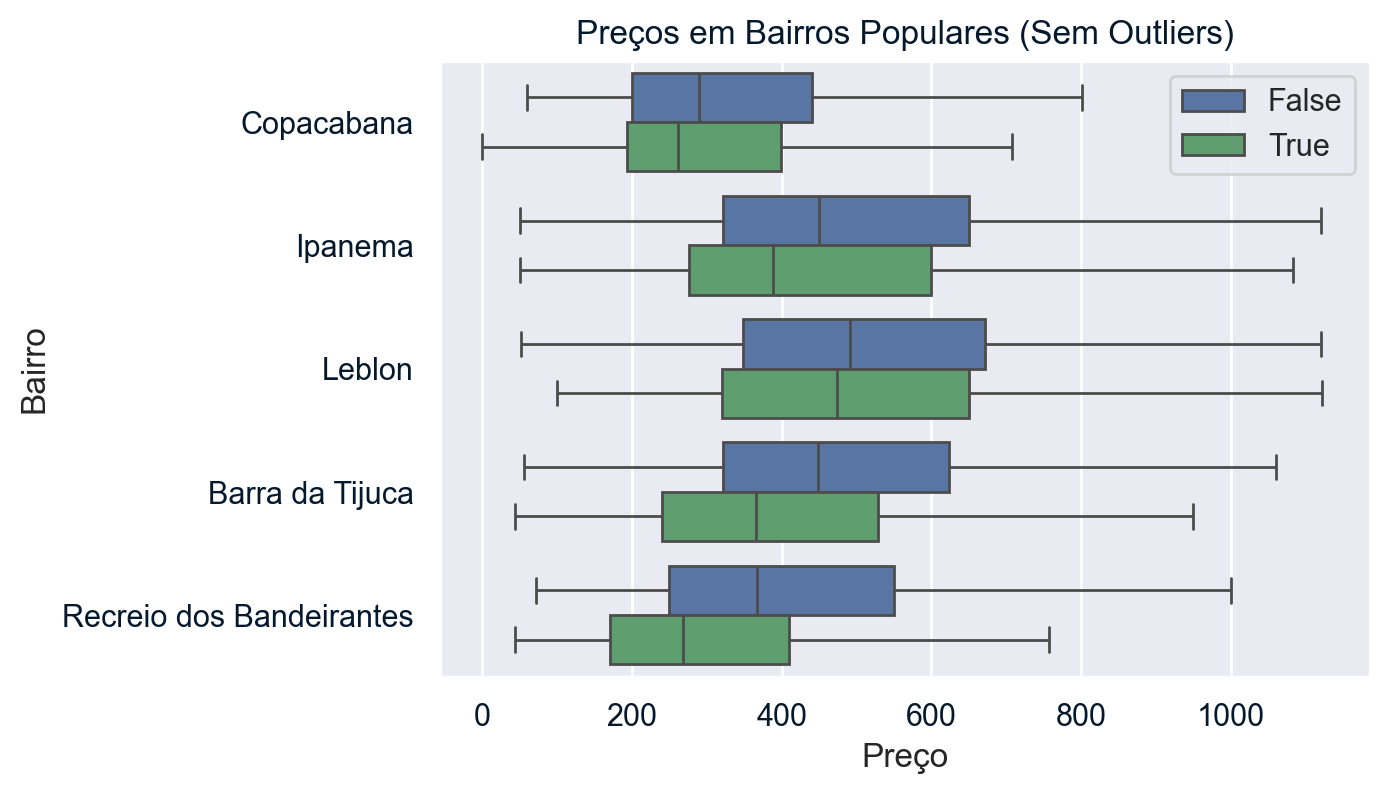

In [36]:
Q1 = rio_listing['price'].quantile(0.25)
Q3 = rio_listing['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

top_neighbourhoods2 = rio_listing['neighbourhood'].value_counts().head(5).index.tolist()
top_neighbourhoods_by_host2 = rio_listing[rio_listing['neighbourhood'].isin(top_neighbourhoods2)]

top_neighbourhoods_by_host_filter = top_neighbourhoods_by_host2[
    (top_neighbourhoods_by_host2['price'] >= lower_bound) & 
    (top_neighbourhoods_by_host2['price'] <= upper_bound)
]

plt.figure(figsize=(6, 4))
sns.boxplot(data=top_neighbourhoods_by_host_filter, x='price', y='neighbourhood', hue='is_professional', fliersize=0, palette=['#4c72b0', '#55a868'])
plt.xlabel('Preço')
plt.ylabel('Bairro')
plt.title('Preços em Bairros Populares (Sem Outliers)')
plt.legend(loc='upper right')
plt.show()


Com base na análise, algumas descobertas importantes emergem sobre os anfitriões do Airbnb no Rio de Janeiro:

Anfitriões profissionais, que possuem muitas listagens, predominam em bairros populares, sugerindo uma forte presença de profissionais do setor imobiliário nesses locais.

Apesar de sua predominância, os anfitriões profissionais oferecem preços médios mais baixos em comparação aos anfitriões comuns. Isso pode ser uma estratégia para manter a competitividade ou devido a economias de escala nas operações.

Nos bairros mais populares, a variação de preços é mais equilibrada entre profissionais e comuns quando removemos outliers. Isso indica que as condições de mercado são relativamente homogêneas nesses locais.